Question I want to explore:
Hows does a countries economic status impact its citizens thoughts on its government and political system

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt

In [71]:
pd.set_option("display.max_columns", None)
wv = pd.read_csv("worldvalues-data.csv", dtype='object', na_values = ['-5', '-4', '-3', '-2', '-1'])
wv.shape

(89565, 440)

In [72]:
wv

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V44_ES,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V56_NZ,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V74B,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125_00,V125_01,V125_02,V125_03,V125_04,V125_05,V125_06,V125_07,V125_08,V125_09,V125_10,V125_11,V125_12,V125_13,V125_14,V125_15,V125_16,V125_17,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V160A,V160B,V160C,V160D,V160E,V160F,V160G,V160H,V160I,V160J,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V203A,V204,V205,V206,V207,V207A,V208,V209,V210,V211,V212,V213,V214,V215_01,V215_02,V215_03,V215_04,V215_05,V215_06,V215_07,V215_08,V215_10,V215_11,V215_12,V215_13,V215_14,V215_15,V215_16,V215_17,V215_18,V216,V217,V218,V219,V220,V221,V222,V223,V224,V218_ESMA,V217_ESMA,V219_ESMA,V220_ESMA,V221_ESMA,V222_ESMA,V223_ESMA,V224_ESMA,V225,V226,V227,V228,V228_2,V228A,V228B,V228C,V228D,V228E,V228F,V228G,V228H,V228I,V228J,V228K,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V243_AU,V244,V244_AU,V245,V246,V247,V248,V248_CS,V249,V250,V251,V252,V253,V253_CS,V254,V255,V256,V256B,V256C,V257,V258,V258A,V260,V261,V262,V265,Y001,Y001_1,Y001_2,Y001_3,Y001_4,Y001_5,Y002,Y003,MN_35A,MN_163A,MN_163B,MN_163C,MN_228L,MN_228M,MN_228N,MN_228O,MN_228P,MN_228Q,MN_228R,MN_228S1,MN_228S2,MN_228S3,MN_228S4,MN_228S5,MN_228S6,MN_228S7,MN_228S8,MN_229A,MN_229B,MN_230A,MN_233A,MN_233B,MN_234A,MN_237A,MN_237B1,MN_237B2,MN_237B3,MN_237B4,MN_237B5,MN_237B6,MN_237B7,MN_237C1,MN_237C2,MN_237C3,MN_237C4,MN_237C5,MN_237C6,MN_249A1,MN_249A2,MN_249A3,SACSECVAL,SECVALWGT,RESEMAVAL,WEIGHTB,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,WEIGHT1A,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,WEIGHT2A,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,WEIGHT3A,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,WEIGHT4A,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,WEIGHT1B,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,WEIGHT2B,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,WEIGHT3B,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,WEIGHT4B,S001,S007,S018,S019,S021,S024,S025,COW
0,2010-2013,Algeria,Algeria,1,1,1,1,No answer,1,1,2,1,1,1,2,2,2,2,2,2,2,1,2,8,2,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,1,2,2,1,1,Not asked,1,Not asked,1,1,1,1,1,1,1,1,7,4,Not asked in survey,Single,No children,10,2,3,1,3,3,1,1,1,1,1,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,Like me,Like me,Very much like me,Like me,Somewhat like me,Somewhat like me,Discrimination against girls and women,1,2,2,4,No answer,No answer,No answer,No answer,No answer,NaN,NaN,NaN,NaN,NaN,5,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,3,2,2,4,3,3,2,3,2,3,4,4,3,Not asked in survey,Not asked in survey,Not asked in survey,4,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,0,0,4,1,2,2,2,3,8,5,6,9,3,4,7,6,7,5,2,2,Muslim,Once a month,Several times each week,1,1,1,No answer,No answer,10,1,2,2,1,2,7,4,3,2,3,1,9,1,2,1,2,2,Neither agree nor disagree,Disagree a little,Neither agree nor disagree,Disagree a little,Disagree strongly,Disagree a little,Disagree a little,Neither agree nor disagree,Disagree a little,Disagree a little,2,2,2,2,2,2,5,5,1,5,1,2,2,3,2,3,3,2,3,3,3,3,7,8,3,5,6,9,6,6,Never justifiable,Never justifiable,Never justifiable,Never justifiab

Created a csv file using World Bank classifications for countries economis based on income
https://datahelpdesk.worldbank.org/knowledgebase/articles/906519-world-bank-country-and-lending-groups

In [73]:
wb_incomes = pd.read_csv("worldbank_incomegroups.csv")
wb_incomes.shape

(218, 2)

In [74]:
wb_incomes

,country,income_group
0,Afghanistan,Low
1,Benin,Low
2,Burkina Faso,Low
3,Burundi,Low
4,Central African Republic,Low
5,Chad,Low
6,"Congo, Dem. Rep",Low
7,Eritrea,Low
8,Ethiopia,Low
9,"Gambia, The",Low


Using the world values dictionary provided can see there are some discrepencies between how countries are labeled:

- Taiwan - Taiwan, China
- Palestine not listed by world bank
- Hong Kong - Hong Kong SAR, China
- South Korea - Korea, Rep.
- Kyrgstan - Kyrgyz Republic
- Russia - Russian Federation
- Egypt - Egypt, Arab Rep.
- Yemen - Yemen, Rep.

In [61]:
# replace world bank country labels with those matching the world values dictionary
wb_incomes.replace({"Taiwan, China" : "Taiwan", "Hong Kong SAR, China" : "Hong Kong", "Egypt, Arab Rep." : "Egypt", "Korea, Rep." : "South Korea", "Kyrgyz Republic" : "Kyrgstan", "Russian Federation": "Russia", "Yemen, Rep." : "Yemen"}, inplace=True)
pd.set_option('display.max_rows', 500)
wb_incomes

,country,income_group
0,Afghanistan,Low
1,Benin,Low
2,Burkina Faso,Low
3,Burundi,Low
4,Central African Republic,Low
5,Chad,Low
6,"Congo, Dem. Rep",Low
7,Eritrea,Low
8,Ethiopia,Low
9,"Gambia, The",Low


The World Bank lists 218 countries while our data set only has data for 56 so do a left merge with the existing world values data on the left

In [75]:
wv_incomes = pd.merge(wv, wb_incomes, left_on ="V2", right_on = "country", how="left")
wv_incomes

,V1,V2,V2A,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V44_ES,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V56_NZ,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V74B,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125_00,V125_01,V125_02,V125_03,V125_04,V125_05,V125_06,V125_07,V125_08,V125_09,V125_10,V125_11,V125_12,V125_13,V125_14,V125_15,V125_16,V125_17,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V160A,V160B,V160C,V160D,V160E,V160F,V160G,V160H,V160I,V160J,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V203A,V204,V205,V206,V207,V207A,V208,V209,V210,V211,V212,V213,V214,V215_01,V215_02,V215_03,V215_04,V215_05,V215_06,V215_07,V215_08,V215_10,V215_11,V215_12,V215_13,V215_14,V215_15,V215_16,V215_17,V215_18,V216,V217,V218,V219,V220,V221,V222,V223,V224,V218_ESMA,V217_ESMA,V219_ESMA,V220_ESMA,V221_ESMA,V222_ESMA,V223_ESMA,V224_ESMA,V225,V226,V227,V228,V228_2,V228A,V228B,V228C,V228D,V228E,V228F,V228G,V228H,V228I,V228J,V228K,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V243_AU,V244,V244_AU,V245,V246,V247,V248,V248_CS,V249,V250,V251,V252,V253,V253_CS,V254,V255,V256,V256B,V256C,V257,V258,V258A,V260,V261,V262,V265,Y001,Y001_1,Y001_2,Y001_3,Y001_4,Y001_5,Y002,Y003,MN_35A,MN_163A,MN_163B,MN_163C,MN_228L,MN_228M,MN_228N,MN_228O,MN_228P,MN_228Q,MN_228R,MN_228S1,MN_228S2,MN_228S3,MN_228S4,MN_228S5,MN_228S6,MN_228S7,MN_228S8,MN_229A,MN_229B,MN_230A,MN_233A,MN_233B,MN_234A,MN_237A,MN_237B1,MN_237B2,MN_237B3,MN_237B4,MN_237B5,MN_237B6,MN_237B7,MN_237C1,MN_237C2,MN_237C3,MN_237C4,MN_237C5,MN_237C6,MN_249A1,MN_249A2,MN_249A3,SACSECVAL,SECVALWGT,RESEMAVAL,WEIGHTB,I_AUTHORITY,I_NATIONALISM,I_DEVOUT,DEFIANCE,WEIGHT1A,I_RELIGIMP,I_RELIGBEL,I_RELIGPRAC,DISBELIEF,WEIGHT2A,I_NORM1,I_NORM2,I_NORM3,RELATIVISM,WEIGHT3A,I_TRUSTARMY,I_TRUSTPOLICE,I_TRUSTCOURTS,SCEPTICISM,WEIGHT4A,I_INDEP,I_IMAGIN,I_NONOBED,AUTONOMY,WEIGHT1B,I_WOMJOB,I_WOMPOL,I_WOMEDU,EQUALITY,WEIGHT2B,I_HOMOLIB,I_ABORTLIB,I_DIVORLIB,CHOICE,WEIGHT3B,I_VOICE1,I_VOICE2,I_VOI2_00,VOICE,WEIGHT4B,S001,S007,S018,S019,S021,S024,S025,COW,country,income_group
0,2010-2013,Algeria,Algeria,1,1,1,1,No answer,1,1,2,1,1,1,2,2,2,2,2,2,2,1,2,8,2,0,0,0,0,0,0,0,0,0,0,0,1,2,2,2,1,2,2,1,1,Not asked,1,Not asked,1,1,1,1,1,1,1,1,7,4,Not asked in survey,Single,No children,10,2,3,1,3,3,1,1,1,1,1,Very much like me,Very much like me,Very much like me,Very much like me,Very much like me,Like me,Like me,Very much like me,Like me,Somewhat like me,Somewhat like me,Discrimination against girls and women,1,2,2,4,No answer,No answer,No answer,No answer,No answer,NaN,NaN,NaN,NaN,NaN,5,8,7,6,8,7,5,2,2,2,2,2,2,1,3,3,2,3,2,2,4,3,3,2,3,2,3,4,4,3,Not asked in survey,Not asked in survey,Not asked in survey,4,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,Not asked in survey,0,0,4,1,2,2,2,3,8,5,6,9,3,4,7,6,7,5,2,2,Muslim,Once a month,Several times each week,1,1,1,No answer,No answer,10,1,2,2,1,2,7,4,3,2,3,1,9,1,2,1,2,2,Neither agree nor disagree,Disagree a little,Neither agree nor disagree,Disagree a little,Disagree strongly,Disagree a little,Disagree a little,Neither agree nor disagree,Disagree a little,Disagree a little,2,2,2,2,2,2,5,5,1,5,1,2,2,3,2,3,3,2,3,3,3,3,7,8,3,5,6,9,6,6,Never justifiable,Never justifiable,Never justif

In [76]:
# reduce data to columns relevant to opinions on government
wv_gov = wv_incomes[["V2", "V126", "V127", "V128", "V129", "V130", "income_group"]]
wv_gov

,V2,V126,V127,V128,V129,V130,income_group
0,Algeria,4,1,2,2,2,Upper-middle
1,Algeria,3,1,3,2,1,Upper-middle
2,Algeria,2,1,3,2,2,Upper-middle
3,Algeria,3,2,3,4,3,Upper-middle
4,Algeria,3,2,3,4,2,Upper-middle
...,...,...,...,...,...,...,...
89560,Zimbabwe,2,4,2,4,1,Lower-middle
89561,Zimbabwe,1,4,2,4,1,Lower-middle
89562,Zimbabwe,1,4,2,4,1,Lower-middle
89563,Zimbabwe,1,4,1,4,1,Lower-middle


In [77]:
# rename columns for readability
wv_gov = wv_gov.rename(columns = {"V2" : "Country", "V126" : "Confidence in United Nations", "V127" : "Favor Strong Leader", "V128" : "Support Expert Decision Makers", "V129" : "Favor Army Rule", "V130" : "Favor Democracy", "income_group" : "Income Group"})
wv_gov

,Country,Confidence in United Nations,Favor Strong Leader,Support Expert Decision Makers,Favor Army Rule,Favor Democracy,Income Group
0,Algeria,4,1,2,2,2,Upper-middle
1,Algeria,3,1,3,2,1,Upper-middle
2,Algeria,2,1,3,2,2,Upper-middle
3,Algeria,3,2,3,4,3,Upper-middle
4,Algeria,3,2,3,4,2,Upper-middle
...,...,...,...,...,...,...,...
89560,Zimbabwe,2,4,2,4,1,Lower-middle
89561,Zimbabwe,1,4,2,4,1,Lower-middle
89562,Zimbabwe,1,4,2,4,1,Lower-middle
89563,Zimbabwe,1,4,1,4,1,Lower-middle


In [78]:
# turn non answers into NaN
wv_gov.replace(['Missing', 'Unknown', 'Not asked in suvey', 'Not applicable', 'No answer', 'Dont know'], np.nan, inplace=True)
wv_gov.replace(['BH','HT','RU','AR','DE','PS','SE', 'SG', 'TR', 'HT: Dropped out survey; RU: Inappropriate response{Inappropriate}', 'Not asked in survey', 'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}'], np.nan, inplace=True)
wv_gov[44:50]

,Country,Confidence in United Nations,Favor Strong Leader,Support Expert Decision Makers,Favor Army Rule,Favor Democracy,Income Group
44,Algeria,4,NaN,2,NaN,NaN,Upper-middle
45,Algeria,3,2,2,3,1,Upper-middle
46,Algeria,4,3,2,3,1,Upper-middle
47,Algeria,3,3,2,3,1,Upper-middle
48,Algeria,NaN,NaN,NaN,NaN,NaN,Upper-middle
49,Algeria,4,3,3,2,1,Upper-middle


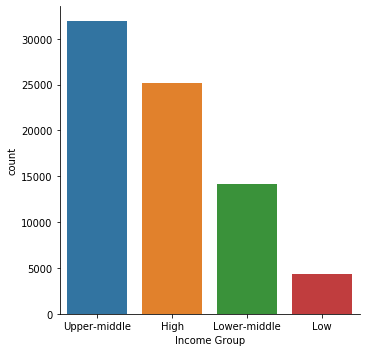

In [65]:
wv_temp = wv_gov.replace({1 : "Very Good", 2 : "Fairly Good", 3 : "Fairly Bad", 4 : "Bad"})
sns.catplot(x="Income Group", kind="count", data=wv_temp);

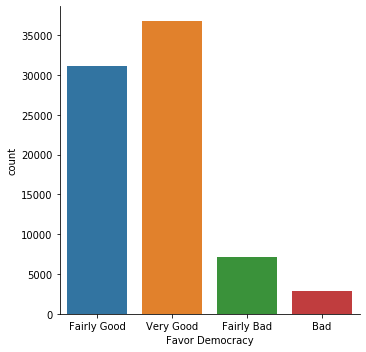

In [66]:
wv_temp = wv_gov.replace({1 : "Very Good", 2 : "Fairly Good", 3 : "Fairly Bad", 4 : "Bad"})
sns.catplot(x="Favor Democracy", kind="count", data=wv_temp);

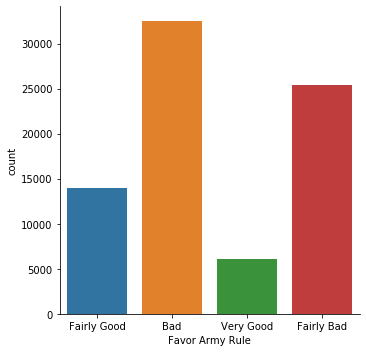

In [67]:
sns.catplot(x="Favor Army Rule", kind="count", data=wv_gov);

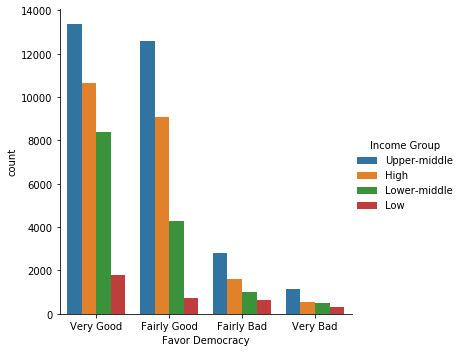

In [81]:
wv_gov = wv_gov.dropna(subset=["Favor Democracy"])
wv_gov["Favor Democracy"] = pd.to_numeric(wv_gov["Favor Democracy"])
sns.catplot(x="Favor Democracy", kind="count", hue="Income Group", data=wv_gov).set(xticklabels=["Very Good", "Fairly Good", "Fairly Bad", "Very Bad"])

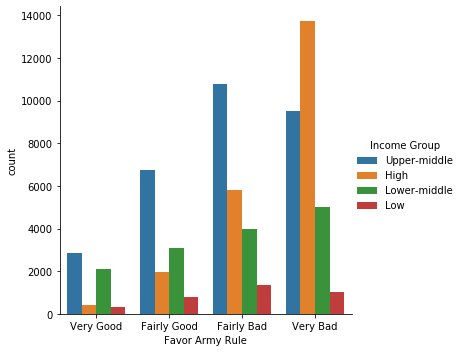

In [82]:
wv_gov = wv_gov.dropna(subset=["Favor Army Rule"])
wv_gov["Favor Army Rule"] = pd.to_numeric(wv_gov["Favor Army Rule"])
sns.catplot(x="Favor Army Rule", kind="count", hue="Income Group", data=wv_gov).set(xticklabels=["Very Good", "Fairly Good", "Fairly Bad", "Very Bad"])

In [35]:
# get subset for each income group option
high = wv_gov[wv_gov["Income Group"] == "High"]
upper_middle = wv_gov[wv_gov["Income Group"] == "Upper-middle"]
lower_middle = wv_gov[wv_gov["Income Group"] == "Lower-middle"]
low = wv_gov[wv_gov["Income Group"] == "Low"]

# find number of each result option by income group
high = high["Favor Democracy"].value_counts()
upper_middle = upper_middle["Favor Democracy"].value_counts()
lower_middle = lower_middle["Favor Democracy"].value_counts()
low = low["Favor Democracy"].value_counts()

# create new data frame for democracy responses
fav_dem = pd.DataFrame(np.array([high, upper_middle, lower_middle, low]), columns = ['Very Good', 'Fairly Good', 'Fairly Bad', 'Very Bad'], index = ["High", "Upper-middle", "Lower-middle", "Low"])
fav_dem

,Very Good,Fairly Good,Fairly Bad,Very Bad
High,11446,11079,2018,646
Upper-middle,13885,13692,3103,1260
Lower-middle,8372,4287,990,491
Low,2230,1032,673,362


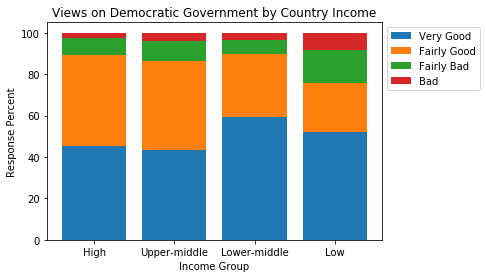

In [23]:
totals = [i+j+k+l for i,j,k,l in zip(fav_dem['Very Good'], fav_dem['Fairly Good'], fav_dem['Fairly Bad'], fav_dem['Very Bad'])]
vg = [i / j * 100 for i,j in zip(fav_dem['Very Good'], totals)]
fg = [i / j * 100 for i,j in zip(fav_dem['Fairly Good'], totals)]
fb = [i / j * 100 for i,j in zip(fav_dem['Fairly Bad'], totals)]
b = [i / j * 100 for i,j in zip(fav_dem['Very Bad'], totals)]

# plot
barWidth = 0.85
names = ('High','Upper-middle','Lower-middle','Low')
plt.bar(fav_dem.index, vg, label='Very Good')
plt.bar(fav_dem.index, fg, bottom=vg, label='Fairly Good')
plt.bar(fav_dem.index, fb, bottom=[i+j for i,j in zip(vg, fg)], label='Fairly Bad')
plt.bar(fav_dem.index, b, bottom=[i+j+k for i,j,k in zip(vg, fg, fb)], label='Bad')
# Custom x axis
plt.xticks(fav_dem.index, names)
plt.xlabel("Income Group")
plt.ylabel("Response Percent")
plt.legend(bbox_to_anchor=(1,1), ncol=1)
plt.title("Views on Democratic Government by Country Income")
# Show graphic
plt.show()


In [45]:
# get subset for each income group option
army_high = wv_gov[wv_gov["Income Group"] == "High"]
army_upper_middle = wv_gov[wv_gov["Income Group"] == "Upper-middle"]
army_lower_middle = wv_gov[wv_gov["Income Group"] == "Lower-middle"]
army_low = wv_gov[wv_gov["Income Group"] == "Low"]

# find number of each result option by income group
army_high = army_high["Favor Army Rule"].value_counts()
army_high = army_high.sort_index()
army_upper_middle = army_upper_middle["Favor Army Rule"].value_counts()
army_upper_middle = army_upper_middle.sort_index()
army_lower_middle = army_lower_middle["Favor Army Rule"].value_counts()
army_lower_middle = army_lower_middle.sort_index()
army_low = army_low["Favor Army Rule"].value_counts()
army_low = army_low.sort_index()
# create new data frame for democracy responses
fav_army = pd.DataFrame(np.array([army_high, army_upper_middle, army_lower_middle, army_low]), columns = ['Very Good', 'Fairly Good', 'Fairly Bad', 'Very Bad'], index = ["High", "Upper-middle", "Lower-middle", "Low"])
fav_army

,Very Good,Fairly Good,Fairly Bad,Very Bad
High,459,2266,7248,15216
Upper-middle,2929,7005,11557,10449
Lower-middle,2087,3066,3982,5005
Low,370,941,1606,1380


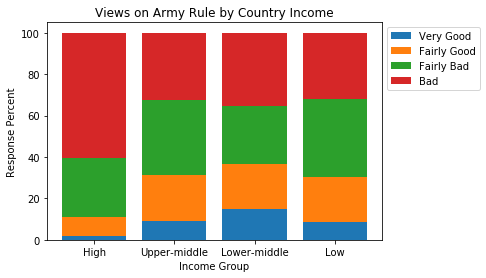

In [47]:
totals = [i+j+k+l for i,j,k,l in zip(fav_army['Very Good'], fav_army['Fairly Good'], fav_army['Fairly Bad'], fav_army['Very Bad'])]
vg = [i / j * 100 for i,j in zip(fav_army['Very Good'], totals)]
fg = [i / j * 100 for i,j in zip(fav_army['Fairly Good'], totals)]
fb = [i / j * 100 for i,j in zip(fav_army['Fairly Bad'], totals)]
b = [i / j * 100 for i,j in zip(fav_army['Very Bad'], totals)]

# plot
barWidth = 0.85
names = ('High','Upper-middle','Lower-middle','Low')
plt.bar(fav_army.index, vg, label='Very Good')
plt.bar(fav_army.index, fg, bottom=vg, label='Fairly Good')
plt.bar(fav_army.index, fb, bottom=[i+j for i,j in zip(vg, fg)], label='Fairly Bad')
plt.bar(fav_army.index, b, bottom=[i+j+k for i,j,k in zip(vg, fg, fb)], label='Bad')
# Custom x axis
plt.xticks(fav_army.index, names)
plt.xlabel("Income Group")
plt.ylabel("Response Percent")
plt.legend(bbox_to_anchor=(1,1), ncol=1)
plt.title("Views on Army Rule by Country Income")
# Show graphic
plt.show()